In [6]:
#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from model_inputs import split_on_h_group
import matplotlib.pyplot as plt
import seaborn as sns
#import tables
import time
from scipy import stats

import pdb

In [2]:
#FUNCTIONS
def count_aa(encoding):
    '''Count differnt amino acid occurence in encoding
    '''
    counts = Counter(encoding)

    aa_feature = []
    for i in range(0,22):
        if i in counts.keys():
            aa_feature.append(counts[i])
        else:
            aa_feature.append(0)
    
    aa_feature = np.asarray(aa_feature)
    aa_feature = aa_feature/len(encoding)
    aa_feature = aa_feature.tolist()
    return aa_feature

def count_str(encoding):
    '''Count differnt amino acid occurence in encoding
    '''
    counts = Counter(encoding)
    str_feature = []
    for i in range(0,10):
        if i in counts.keys():
            str_feature.append(counts[i])
        else:
            str_feature.append(0)
    str_feature = np.asarray(str_feature)
    str_feature = str_feature/len(encoding) #Normalize due to aln length
    str_feature = str_feature.tolist()
    return str_feature

def create_features(df,min_val, max_val):
    '''Get features
    '''
    #Get MLAAdist
    evdist = np.asarray(df['MLAAdist_x'])
    max_dist = max(evdist)
    #Get encodings
    enc1 = []
    enc2 = []
    [enc1.append(literal_eval(x)) for x in df['enc1']]
    [enc2.append(literal_eval(x)) for x in df['enc2']]
    strenc1 = []
    strenc2 = []
    [strenc1.append(literal_eval(x)) for x in df['strenc1']]
    [strenc2.append(literal_eval(x)) for x in df['strenc2']]
    #Get lengths
    l1 = np.asarray(df['l1'])
    l2 = np.asarray(df['l2'])
    aln_len = np.asarray(df['aln_len'])
    #Get starts and ends
    s1 = np.asarray(df['s1'])
    s2 = np.asarray(df['s2'])
    e1 = np.asarray(df['e1'])
    e2 = np.asarray(df['e2'])

    #Get identities
    identities = np.asarray(df['identity'])
    #Save features
    enc_feature = []


    for i in range(0, len(enc1)):
        enc_feature.append(count_aa(enc1[i])) #Append to list
        enc_feature[i].extend(count_aa(enc2[i]))
        enc_feature[i].extend(count_str(strenc1[i]))
        enc_feature[i].extend(count_str(strenc2[i]))
        enc_feature[i].append(l1[i])
        enc_feature[i].append(l2[i])        
        enc_feature[i].append(aln_len[i])
        enc_feature[i].append(evdist[i]) #Normalizing this did not help
        enc_feature[i].append(s1[i])
        enc_feature[i].append(s2[i])
        enc_feature[i].append(e1[i])
        enc_feature[i].append(e2[i])
        enc_feature[i].append(identities[i])
     
    #Get RMSDs
    rmsds = df["RMSD_x"]
    bins = np.arange(min_val, max_val, 0.1)
    binned_rmsd = np.digitize(rmsds, bins)
    #Data
    X = np.asarray(enc_feature)
    y = np.eye(45)[binned_rmsd-1]

    return(X, y) #, y_binned)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4] 45


(array([3.00e+00, 1.40e+01, 6.50e+01, 1.02e+02, 2.36e+02, 4.32e+02,
        5.70e+02, 6.84e+02, 9.74e+02, 1.25e+03, 1.43e+03, 1.92e+03,
        1.84e+03, 2.47e+03, 2.26e+03, 2.54e+03, 2.98e+03, 2.39e+03,
        2.92e+03, 2.22e+03, 2.23e+03, 1.87e+03, 1.76e+03, 1.22e+03,
        8.95e+02, 6.87e+02, 4.40e+02, 3.08e+02, 1.58e+02, 1.00e+02,
        6.60e+01, 3.80e+01, 2.80e+01, 2.10e+01, 9.00e+00, 7.00e+00,
        2.80e+01, 2.90e+01, 8.00e+00, 1.00e+00, 3.00e+00, 1.00e+00,
        0.00e+00, 3.00e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45.]),
 <a list of 44 Patch objects>)

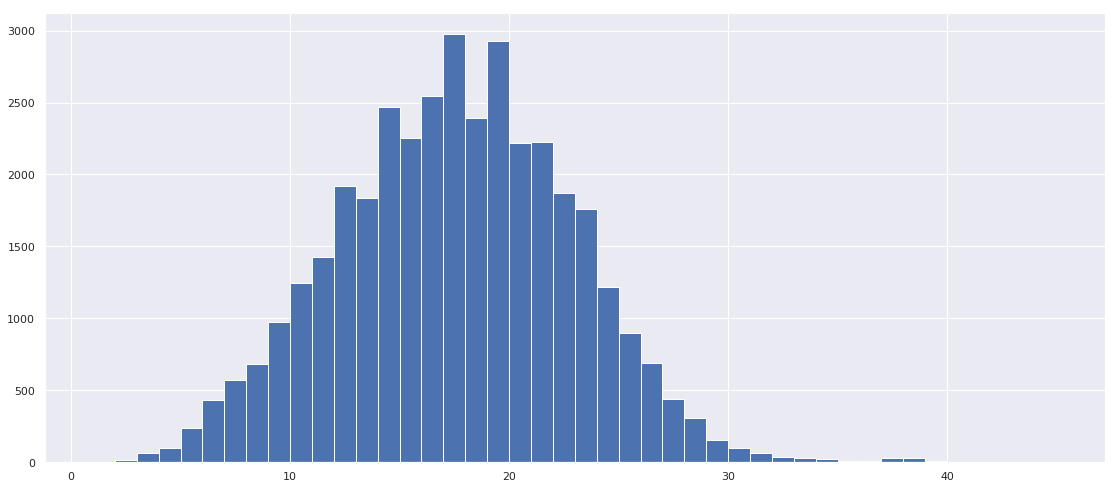

In [80]:
rmsds = complete_df["RMSD_x"]
bins = np.arange(min(rmsds), max(rmsds), 0.1)
print(bins, len(bins))
binned_rmsd = np.digitize(rmsds, bins)
plt.hist(binned_rmsd, bins = 44)

In [79]:
hist = np.histogram(binned_rmsd, bins = 44)
print(hist)
print(bins[0:10],sum(hist[0][0:10]))
print(bins[10:12],sum(hist[0][10:12]))
print(bins[12:14],sum(hist[0][12:14]))
print(bins[14:16],sum(hist[0][14:16]))
print(bins[16:18], sum(hist[0][16:18]))
print(bins[18:20],sum(hist[0][18:20]))
print(bins[20:22],sum(hist[0][20:22]))
print(bins[22:],sum(hist[0][22:]))


(array([   3,   14,   65,  102,  236,  432,  570,  684,  974, 1246, 1427,
       1920, 1837, 2466, 2255, 2545, 2975, 2393, 2924, 2221, 2227, 1871,
       1757, 1221,  895,  687,  440,  308,  158,  100,   66,   38,   28,
         21,    9,    7,   28,   29,    8,    1,    3,    1,    0,    3]), array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45.]))
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] 4326
[1.  1.1] 3347
[1.2 1.3] 4303
[1.4 1.5] 4800
[1.6 1.7] 5368
[1.8 1.9] 5145
[2.  2.1] 4098
[2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9
 4.  4.1 4.2 4.3 4.4] 5808


In [3]:
#Read df
complete_df = pd.read_csv('/home/patrick/complete_df.csv')
#Split
train_groups, valid_groups, test_groups = split_on_h_group(complete_df, 0.8)
train_df = complete_df[complete_df['H_group_x'].isin(train_groups)]
valid_df = complete_df[complete_df['H_group_x'].isin(valid_groups)]
test_df = complete_df[complete_df['H_group_x'].isin(test_groups)]

In [4]:
max_val = max(complete_df["RMSD_x"])
min_val = min(complete_df["RMSD_x"])
X_train,y_train = create_features(train_df,min_val, max_val)
X_valid,y_valid = create_features(valid_df,min_val, max_val)
X_test,y_test = create_features(test_df,min_val, max_val)

11673 11673
0.3914486921529175 0.3914486921529175


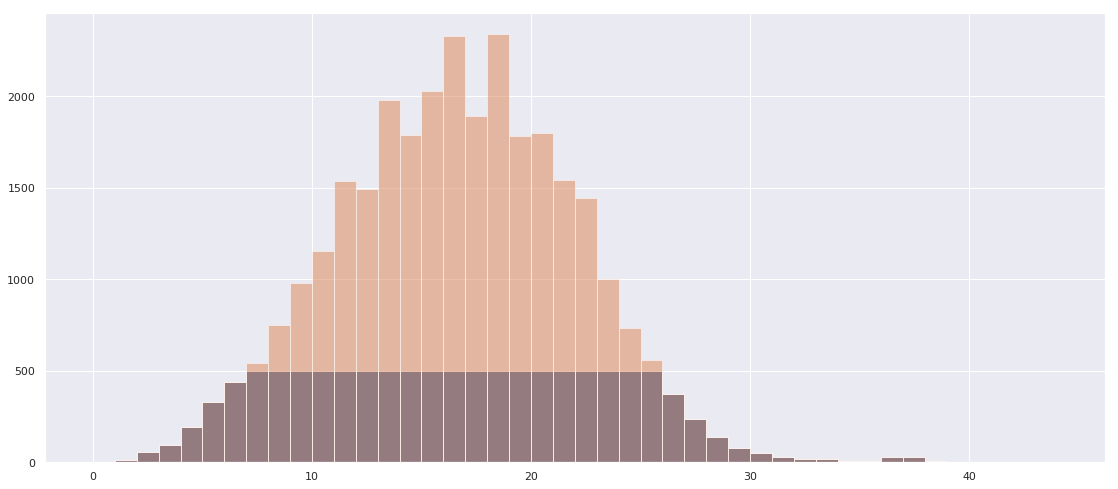

In [106]:
#Take 500 first points in train
X_train_500 = []
y_train_500 = []
count_500 = np.zeros(45)
for i in range(0, len(y_train)):
    pos = np.argmax(y_train[i])
    if count_500[pos] <= 500:
        X_train_500.append(X_train[i])
        y_train_500.append(y_train[i])
        count_500[pos]+=1
        
        
print(len(X_train_500), len(y_train_500))
print(len(X_train_500)/len(X_train), len(y_train_500)/len(y_train))
plt.hist(np.argmax(y_train_500, axis = 1), bins = 44)
plt.hist(np.argmax(y_train, axis = 1),alpha = 0.5, bins = 44)
plt.show()


/home/pbryant/anaconda_ete/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


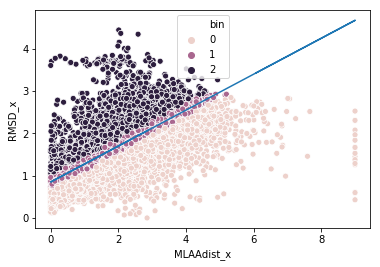

In [8]:
#Plot split
train_df['bin'] = y_train
g = sns.scatterplot(x = "MLAAdist_x", y = "RMSD_x", data = train_df, hue = 'bin')
slope =  0.4251539481958822
intercept = 0.8520459975313011
x_line = np.asarray([*complete_df["MLAAdist_x"]])
y_line = intercept+slope*x_line
plt.plot(x_line, y_line, linestyle='solid')

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


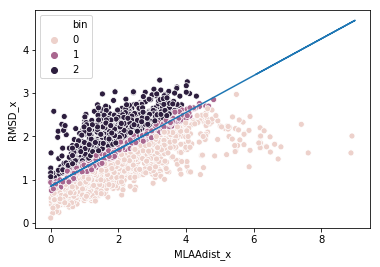

In [9]:
valid_df['bin'] = y_valid
g = sns.scatterplot(x = "MLAAdist_x", y = "RMSD_x", data = valid_df, hue = 'bin')
slope =  0.4251539481958822
intercept = 0.8520459975313011
x_line = np.asarray([*complete_df["MLAAdist_x"]])
y_line = intercept+slope*x_line
plt.plot(x_line, y_line, linestyle='solid')


/home/pbryant/anaconda_ete/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


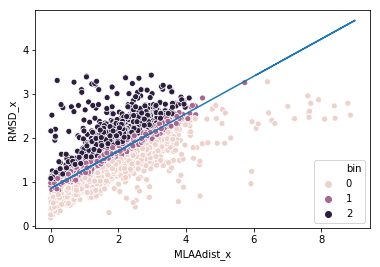

In [10]:
test_df['bin'] = y_test
g = sns.scatterplot(x = "MLAAdist_x", y = "RMSD_x", data = test_df, hue = 'bin')
slope =  0.4251539481958822
intercept = 0.8520459975313011
x_line = np.asarray([*complete_df["MLAAdist_x"]])
y_line = intercept+slope*x_line
plt.plot(x_line, y_line, linestyle='solid')


In [6]:
#Compare with linear regression
reg = LinearRegression().fit(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1), complete_df['RMSD_x'])
reg_predictions = reg.predict(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-complete_df['RMSD_x']))
print(average_error)

0.29990743494657146


/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


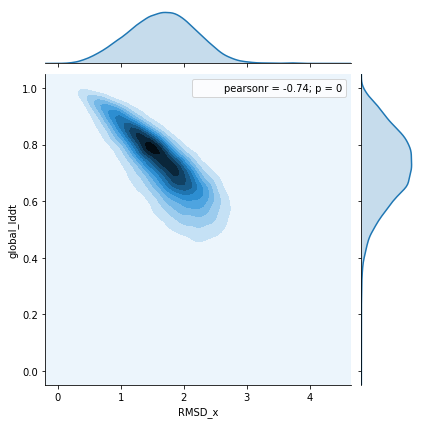

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


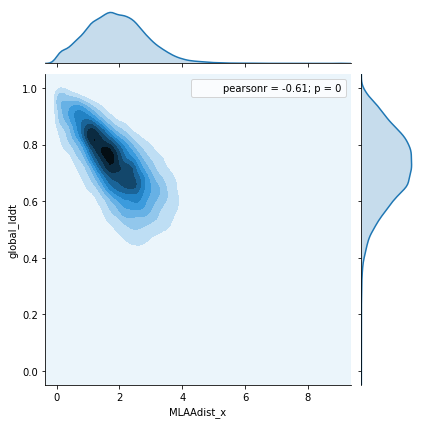

In [13]:
g = sns.jointplot(x='RMSD_x', y = 'global_lddt', data = complete_df, kind = 'kde')
g.annotate(stats.pearsonr)
plt.show()
g = sns.jointplot(x='MLAAdist_x', y = 'global_lddt', data = complete_df, kind = 'kde')
g.annotate(stats.pearsonr)
plt.show()

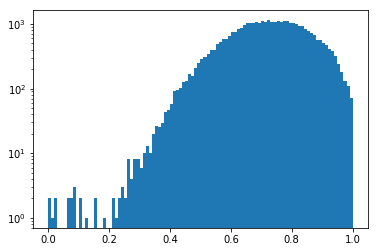

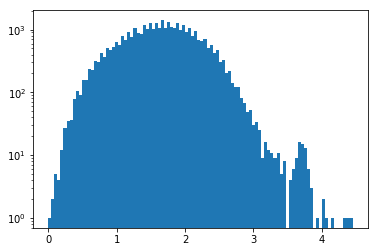

In [18]:
plt.hist(complete_df['global_lddt'], bins = 100, log = True)
plt.show()
plt.hist(complete_df['RMSD_x'], bins = 100, log = True)
plt.show()

VALID PREDICTIONS
Number of points:  3751
average error for rf regressor valid:0.05544240469817956


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


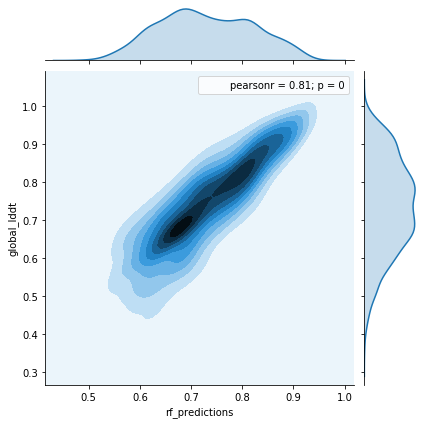

TEST PREDICTIONS
Number of points:  3729
average error for rf regressor test:0.058796224259634614


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


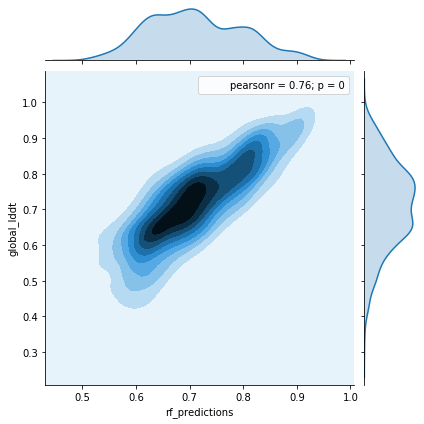

In [11]:
#RandomForestRegressor for flobal lddt
clf = RandomForestRegressor(n_estimators=200, bootstrap = True, max_features = 'sqrt')

# Fit on training data
y_train = np.asarray([*train_df["global_lddt"]])
clf.fit(X_train, y_train)


#VALID DATA
print('VALID PREDICTIONS')
print('Number of points: ', len(valid_df))
clf_predictions_valid = clf.predict(X_valid)
y_valid = np.asarray([*valid_df["global_lddt"]])
average_error = np.average(np.absolute(clf_predictions_valid-y_valid))
print('average error for rf regressor valid:' + str(average_error))
df = valid_df['global_lddt']
df = pd.DataFrame(list(zip([*valid_df['global_lddt']])), 
               columns =['global_lddt']) 
df['rf_predictions'] = clf_predictions_valid
g = sns.jointplot(x= 'rf_predictions' , y = 'global_lddt', data = df, kind = 'kde')
g.annotate(stats.pearsonr)
plt.show()

#TEST DATA
print('TEST PREDICTIONS')
print('Number of points: ', len(test_df))
clf_predictions_test = clf.predict(X_test)
y_test = np.asarray([*test_df["global_lddt"]])
average_error = np.average(np.absolute(clf_predictions_test-y_test))
print('average error for rf regressor test:' + str(average_error))
df = test_df['global_lddt']
df = pd.DataFrame(list(zip([*test_df['global_lddt']])), 
               columns =['global_lddt']) 
df['rf_predictions'] = clf_predictions_test
g = sns.jointplot(x= 'rf_predictions' , y = 'global_lddt', data = df, kind = 'kde')
g.annotate(stats.pearsonr)
plt.show()


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.07691085479345597


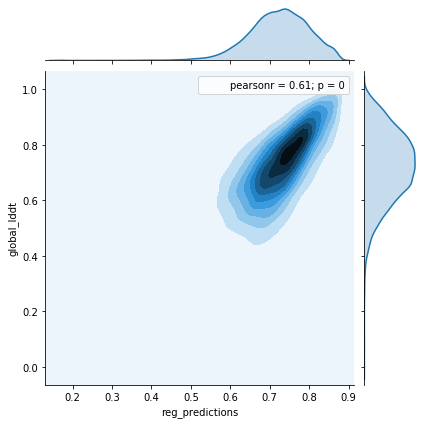

VALID PREDICTIONS
Number of points:  3751


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.07611867871169226


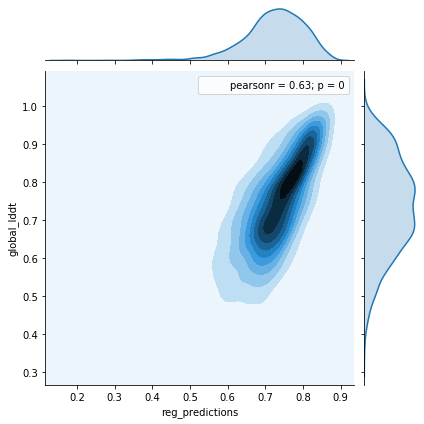

TEST PREDICTIONS
Number of points:  3729


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.07395751923395086


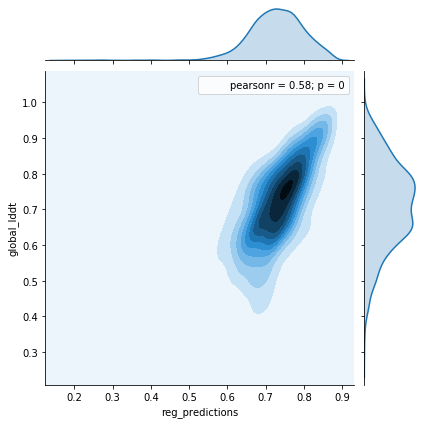

In [60]:
#linear regression for LDDT
reg = LinearRegression().fit(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1), complete_df['global_lddt'])
reg_predictions = reg.predict(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-complete_df['global_lddt']))
reg_df = complete_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*complete_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()
#VALID DATA
print('VALID PREDICTIONS')
print('Number of points: ', len(valid_df))
reg_predictions = reg.predict(np.asarray(valid_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-valid_df['global_lddt']))
reg_df = valid_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*valid_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()

#TEST DATA
print('TEST PREDICTIONS')
print('Number of points: ', len(test_df))
reg_predictions = reg.predict(np.asarray(test_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-test_df['global_lddt']))
reg_df = test_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*test_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()

/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.07691102562012932


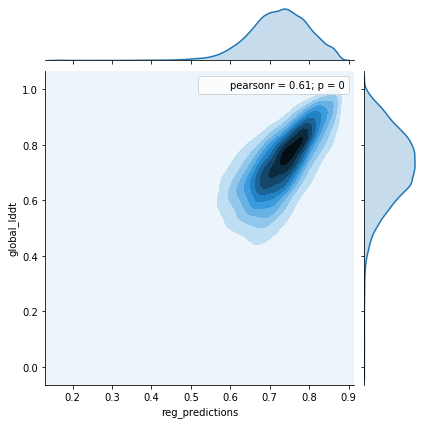

VALID PREDICTIONS
Number of points:  3751


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.07611891148076774


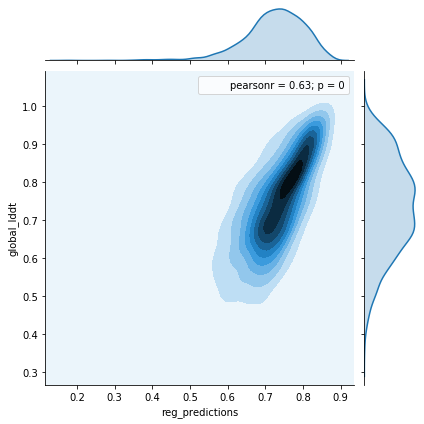

TEST PREDICTIONS
Number of points:  3729


/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average error:  0.0739576537759356


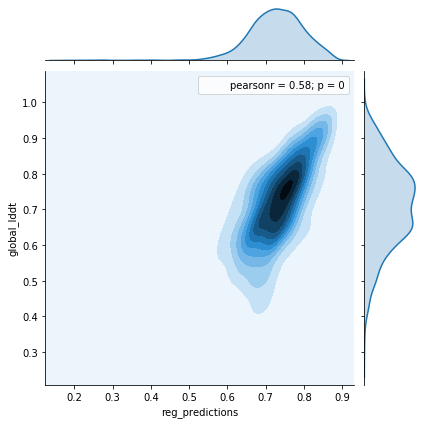

In [7]:
#Ridge regression for LDDT
reg = Ridge().fit(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1), complete_df['global_lddt'])
reg_predictions = reg.predict(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-complete_df['global_lddt']))
reg_df = complete_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*complete_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()
#VALID DATA
print('VALID PREDICTIONS')
print('Number of points: ', len(valid_df))
reg_predictions = reg.predict(np.asarray(valid_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-valid_df['global_lddt']))
reg_df = valid_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*valid_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()

#TEST DATA
print('TEST PREDICTIONS')
print('Number of points: ', len(test_df))
reg_predictions = reg.predict(np.asarray(test_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-test_df['global_lddt']))
reg_df = test_df['global_lddt']
reg_df = pd.DataFrame(list(zip([*test_df['global_lddt']])), 
               columns =['global_lddt']) 

reg_df['reg_predictions'] = reg_predictions 
g = sns.jointplot(x= 'reg_predictions' , y = 'global_lddt', data = reg_df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average error: ',average_error) 
plt.show()

In [50]:
valid_mldists = [*valid_df['MLAAdist_x']]
repeat_dist = []
[repeat_dist.append(np.repeat(i, 300)) for i in valid_mldists]
np.asarray(repeat_dist).shape

(3751, 300)

In [17]:
#RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit on training data
clf.fit(X_train, y_train)

#predict
valid_predictions = clf.predict(X_valid)
test_predictions = clf.predict(X_test)



In [9]:
print(classification_report(y_valid, valid_predictions))
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1406
           1       0.45      0.38      0.41      1262
           2       0.51      0.48      0.49      1083

   micro avg       0.54      0.54      0.54      3751
   macro avg       0.52      0.53      0.52      3751
weighted avg       0.53      0.54      0.53      3751

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1167
           1       0.40      0.40      0.40      1308
           2       0.48      0.48      0.48      1254

   micro avg       0.46      0.46      0.46      3729
   macro avg       0.47      0.47      0.47      3729
weighted avg       0.46      0.46      0.46      3729



In [11]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    classes =['below','on','above']
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title+' confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    np.set_printoptions(precision=2)
    plt.show()

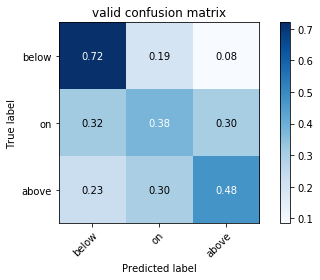

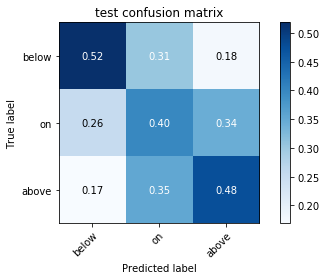

In [12]:
#With str enc
plot_cm(y_valid, valid_predictions, 'valid')
plot_cm(y_test, test_predictions, 'test')

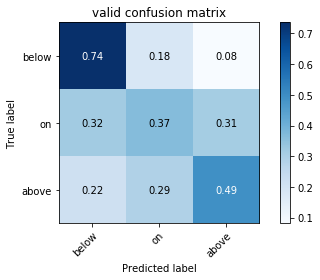

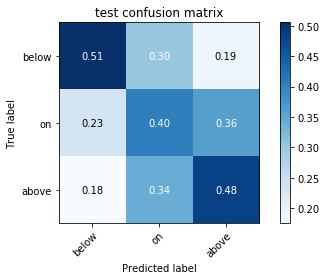

In [23]:
#Without str enc
plot_cm(y_valid, valid_predictions, 'valid')
plot_cm(y_test, test_predictions, 'test')

In [14]:
#RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit on training data
y_train = np.asarray([*train_df["RMSD_x"]])
clf.fit(X_train, y_train)

#predict
clf_predictions_valid = clf.predict(X_valid)
clf_predictions_test = clf.predict(X_test)
#Average error
y_valid = np.asarray([*valid_df["RMSD_x"]])
average_error = np.average(np.absolute(clf_predictions_valid-y_valid))
print('rf regressor valid:' + str(average_error))
y_test = np.asarray([*test_df["RMSD_x"]])
average_error = np.average(np.absolute(clf_predictions_test-y_test))
print('rf regressor test:' + str(average_error))
#Without str enc
#rf regressor valid:0.24640810406113925
#rf regressor test:0.25415321993640577



rf regressor valid:0.2497156225006665
rf regressor test:0.25686167873424515


In [18]:
importances = clf.feature_importances_
#importances = -np.log(importances)

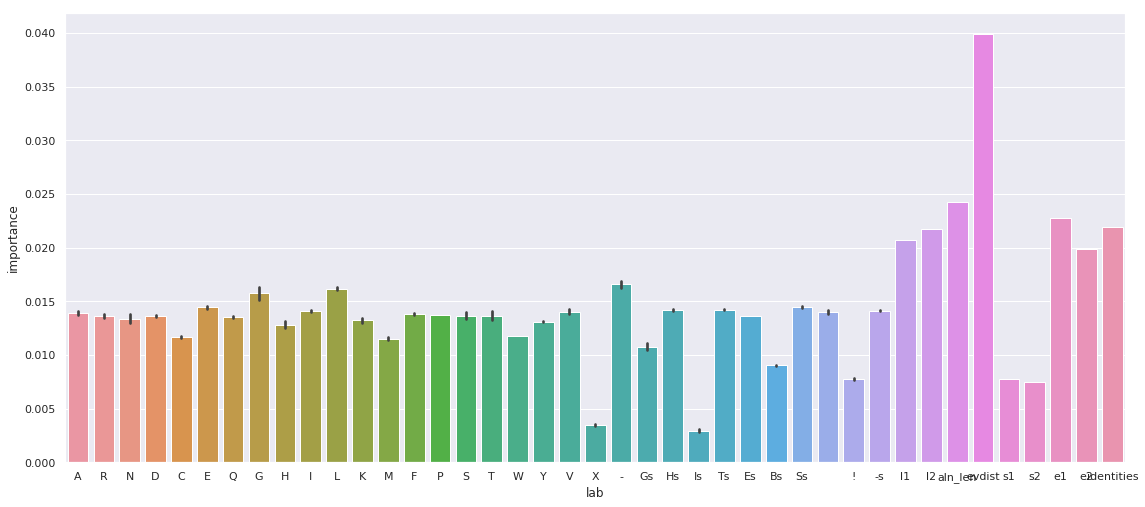

In [21]:
labels = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'X', '-', 'A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'X', '-', 'Gs', 'Hs', 'Is', 'Ts', 'Es', 'Bs', 'Ss', ' ', '!', '-s', 'Gs', 'Hs', 'Is', 'Ts', 'Es', 'Bs', 'Ss', ' ', '!', '-s','l1', 'l2', 'aln_len', 'evdist','s1', 's2', 'e1', 'e2', 'identities']
imp_df = pd.DataFrame({'lab':labels, 'importance':importances})
sns.barplot(x='lab', y='importance', data = imp_df)
sns.set(rc={'figure.figsize':(19,8.27)})
plt.show()

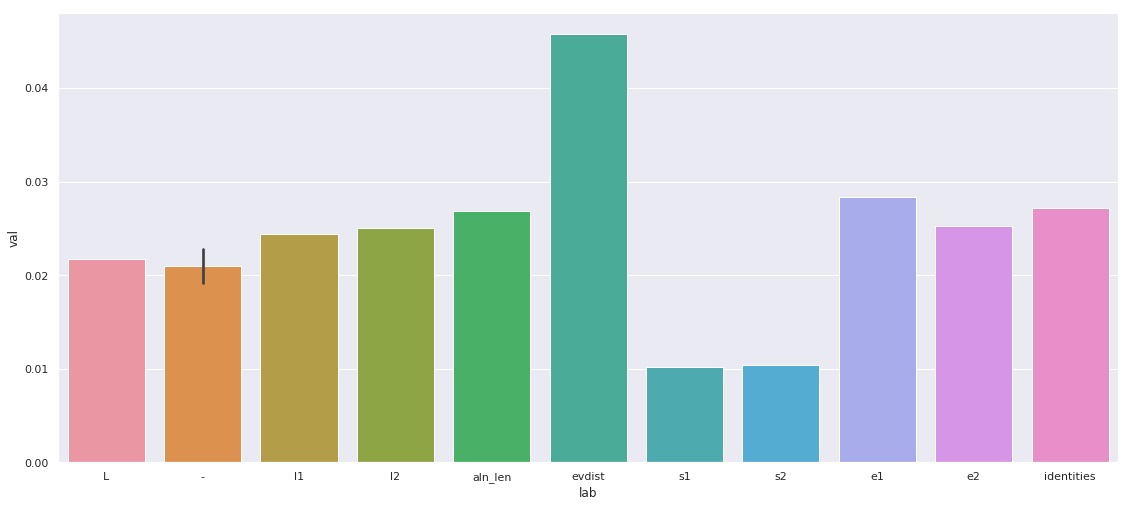

In [27]:
#gap, evdist and identities are the important features
importances_s = [importances[10],importances[21],importances[32],importances[43],importances[44],importances[45],importances[46],importances[47],importances[48],importances[49],importances[50],importances[51], importances[52]]
labels = ['L', '-', 'L', '-', 'l1', 'l2', 'aln_len', 'evdist','s1', 's2', 'e1', 'e2', 'identities']
imp_df = pd.DataFrame({'lab':labels, 'val':importances_s})
sns.barplot(x='lab', y='val', data = imp_df)
sns.set(rc={'figure.figsize':(19,8.27)})
plt.show()

In [45]:
#Running with only gap, evdist, lengths and ends and identities.
#RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit on training data
clf.fit(X_train, y_train)

#predict
clf_predictions_valid = clf.predict(X_valid)
clf_predictions_test = clf.predict(X_test)
#Average error
average_error = np.average(np.absolute(clf_predictions_valid-y_valid))
print('rf regressor valid:' + str(average_error))
average_error = np.average(np.absolute(clf_predictions_test-y_test))
print('rf regressor test:' + str(average_error))

#Binned fitting
# Fit on training data
clf.fit(X_train, y_train_binned)

#predict
clf_predictions = clf.predict(X_valid)

#Average error
average_error = np.average(np.absolute(clf_predictions-y_valid_binned))
print('rf valid:' +str(average_error*0.1))

rf regressor valid:0.05598512544802868
rf regressor test:0.058606097355064904
rf valid:0.06142228739002932


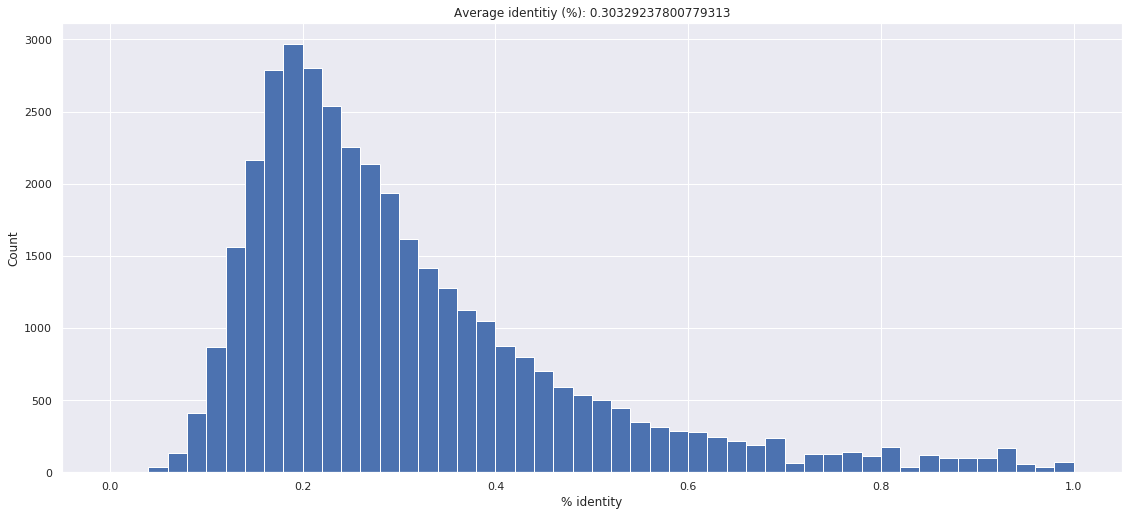

In [139]:
identities = complete_df['identity']
plt.hist(identities, bins = 50)
plt.xlabel('% identity')
plt.ylabel('Count')
plt.title('Average identitiy (%): ' +str(sum(identities)/len(identities)))
plt.show()

In [141]:
#Predicting tmscore
X_train,y_train = create_features(train_df)
X_valid,y_valid = create_features(valid_df)
X_test,y_test = create_features(test_df)

0.7893399027498326


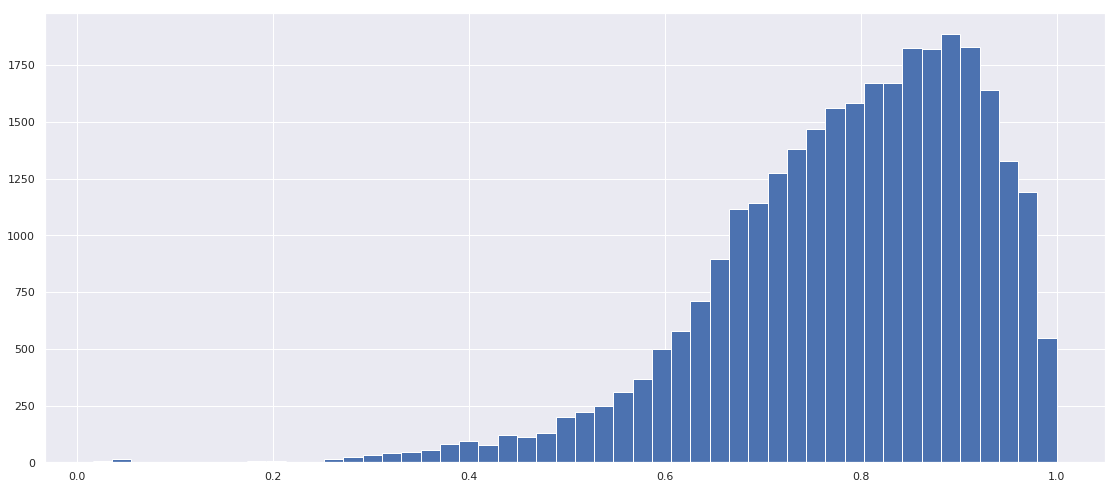

In [142]:
plt.hist(y_train, bins = 50)
print(sum(y_train)/len(y_train))
plt.show()

In [143]:
#Running with only gap, evdist, lengths and ends and identities in predictint TMscore.
#RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit on training data
clf.fit(X_train, y_train)

#predict
clf_predictions_valid = clf.predict(X_valid)
clf_predictions_test = clf.predict(X_test)
#Average error
average_error = np.average(np.absolute(clf_predictions_valid-y_valid))
print('rf regressor valid:' + str(average_error))
average_error = np.average(np.absolute(clf_predictions_test-y_test))
print('rf regressor test:' + str(average_error))

rf regressor valid:0.05725433679251152
rf regressor test:0.06005690200515121


In [144]:
#Compare with linear regression
reg = LinearRegression().fit(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1), complete_df['TMscore'])
reg_predictions = reg.predict(np.asarray(complete_df['MLAAdist_x']).reshape(-1,1))
average_error = np.average(np.absolute(reg_predictions-complete_df['TMscore']))
print(average_error)

0.07190227620905404


/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


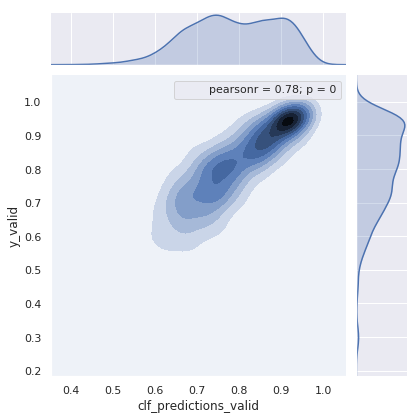

In [78]:
df = pd.DataFrame(list(zip(clf_predictions_valid,y_valid)), 
               columns =['clf_predictions_valid','y_valid']) 
g = sns.jointplot(x='clf_predictions_valid', y='y_valid', data=df, kind = "kde")
g.annotate(stats.pearsonr)
plt.show()

In [99]:
valid_df['tmscore_valid_error'] = valid_df['TMscore']-valid_df['tmscore_valid_pred']
valid_df.columns

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['uid1', 'uid2', 'MLAAdist_x', 'RMSD_x', 'TMscore', 'H_group_x', 'C._x',
       'C.A._x', 'MLAAdist_y', 'RMSD_y', 'TMscore_high', 'TMscore_low',
       'H_group_y', 'C._y', 'C.A._y', 'aln_len', 'identity', 'lse1', 'lse2',
       'encoding', 'deviation', 'l1', 'l2', 's1', 's2', 'e1', 'e2',
       'binned_deviation', 'enc1', 'enc2', 'tmscore_valid_pred',
       'tmscore_valid_error'],
      dtype='object')

max error: 0.6225228
min error: 2.000000000035307e-05


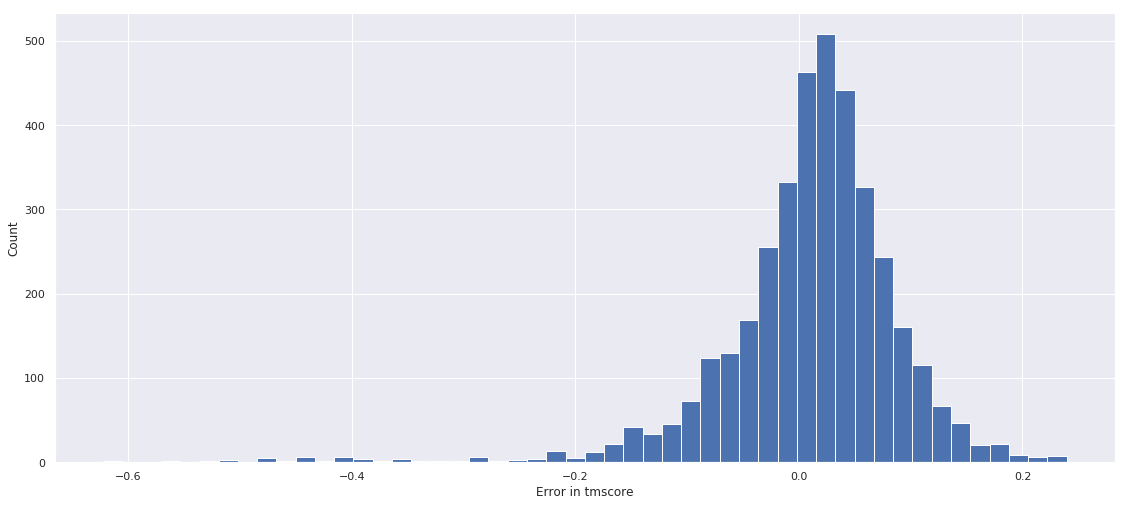

In [115]:
plt.hist(valid_df['tmscore_valid_error'], bins = 50)
print('max error:',max(np.abs(valid_df['tmscore_valid_error'])))
print('min error:',min(np.abs(valid_df['tmscore_valid_error'])))
plt.xlabel('Error in tmscore')
plt.ylabel('Count')
plt.show()

In [125]:
above_average_error_df.columns

Index(['uid1', 'uid2', 'MLAAdist_x', 'RMSD_x', 'TMscore', 'H_group_x', 'C._x',
       'C.A._x', 'MLAAdist_y', 'RMSD_y', 'TMscore_high', 'TMscore_low',
       'H_group_y', 'C._y', 'C.A._y', 'aln_len', 'identity', 'lse1', 'lse2',
       'encoding', 'deviation', 'l1', 'l2', 's1', 's2', 'e1', 'e2',
       'binned_deviation', 'enc1', 'enc2', 'tmscore_valid_pred',
       'tmscore_valid_error'],
      dtype='object')

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


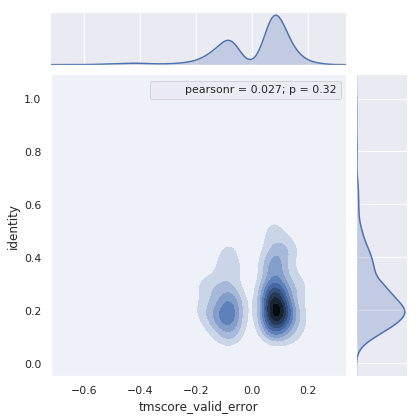

In [127]:
above_average_error_df = valid_df[np.abs(valid_df['tmscore_valid_error'])>0.0575]
g = sns.jointplot(x='tmscore_valid_error', y='identity', data=above_average_error_df, kind = "kde")
g.annotate(stats.pearsonr)
plt.show()

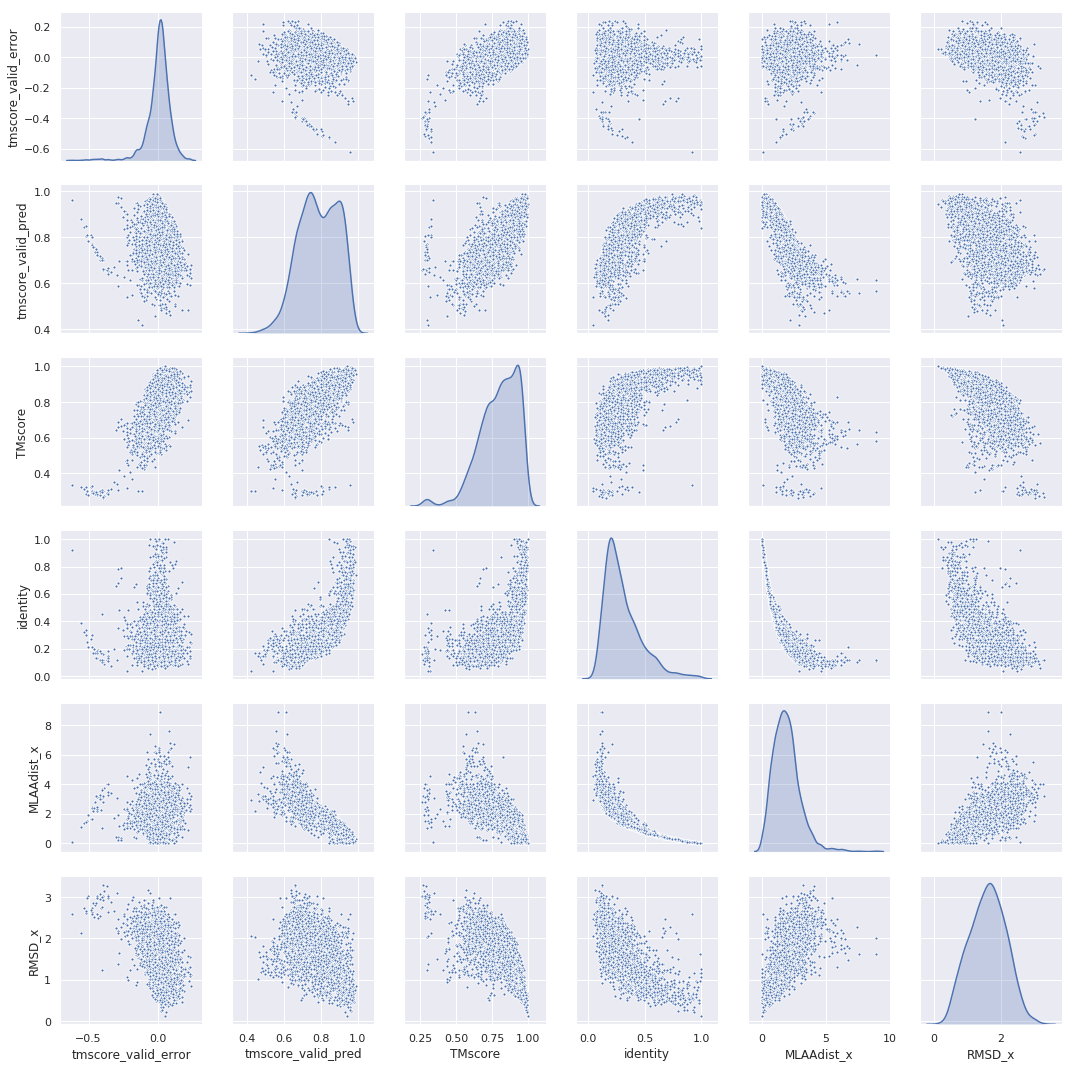

In [100]:
sns.pairplot(valid_df, vars = ['tmscore_valid_error','tmscore_valid_pred',  'TMscore',  'identity', 'MLAAdist_x', 'RMSD_x'],diag_kind = 'kde', palette="Set2", markers=".")
plt.show()

In [49]:
#Adaboost
clf = AdaBoostRegressor(random_state=0, n_estimators=7) #int asssignment of random state ensures same random intitator each run
# Fit on training data
clf.fit(X_train, y_train)

#predict
clf_predictions = clf.predict(X_valid)

#Average error
average_error = np.average(np.absolute(clf_predictions-y_valid))
print(average_error)

#Binned fitting
# Fit on training data
clf.fit(X_train, y_train_binned)

#predict
clf_predictions = clf.predict(X_valid)

#Average error
average_error = np.average(np.absolute(clf_predictions-y_valid_binned))
print(average_error*0.1)


0.2967062716497958
0.2943713238756529


In [3]:
#Using PROFILE representations of alignments
#Read df
complete_with_hmm_df = pd.read_csv('/home/pbryant/results/CATH/20190606/complete_with_hmm_df.csv')

In [72]:
def save_nparray(H_group_data, group, column):
    index = H_group_data.index
    for i in range(index[0], index[-1]+1):
        uid1 = H_group_data['uid1'][i]
        uid2 = H_group_data['uid2'][i]
        name = '/home/pbryant/results/CATH/20190606/'+group+'/'+uid1+'_'+uid2+'.'+column+'.txt'
        t1 = hmm_to_array(H_group_data[column][i])
        np.savetxt(name, t1, fmt='%d')


def hmm_to_array(tx):
    '''Convert hmm to array, replace * with 0
    '''
    tx = literal_eval(tx)
    for i in range(0,len(tx)):
        for j in range(0, len(tx[i])):
            if tx[i][j] == '*':
                tx[i][j] = 0
            else:
                tx[i][j] = int(tx[i][j])
            np.asarray(tx[i])
    return(np.asarray(tx))


In [48]:
groups = Counter(complete_with_hmm_df['H_group_x'])
groups = [*groups.keys()]
for group in groups:
    os.mkdir('/home/pbryant/results/CATH/20190606/'+group)
    H_group_data =  complete_with_hmm_df[complete_with_hmm_df['H_group_x']==group]
    save_nparray(H_group_data, group)

In [51]:
#hmm2
for group in groups:
    H_group_data =  complete_with_hmm_df[complete_with_hmm_df['H_group_x']==group]
    save_nparray(H_group_data, group, 'hmm_list2')

In [73]:
#Transition frequencies and local divergences
columns = ['transition_freq1', 'transition_freq2', 'local_div1', 'local_div2']
for column in columns:
    for group in groups:
        H_group_data =  complete_with_hmm_df[complete_with_hmm_df['H_group_x']==group]
        save_nparray(H_group_data, group, column)

In [62]:
#LOAD
hmm1 = {}
base = '/home/pbryant/results/CATH/20190606/'
for group in groups:
    H_group_data = complete_with_hmm_df[complete_with_hmm_df['H_group_x']==group]
    uid1 = [*H_group_data['uid1']]
    uid2 = [*H_group_data['uid2']]
    for i in range(0,len(uid1)):
        name = uid1[i]+'_'+uid2[i]
        c = np.loadtxt(base+group+'/'+name+'.hmm1.txt', dtype=int)
        hmm1[name] = c



In [158]:
hmm2 = {}
transition_freq1= {}
transition_freq2= {}
local_div1= {}
local_div2= {}

columns = ['hmm2','transition_freq1', 'transition_freq2', 'local_div1', 'local_div2']
base = '/home/pbryant/results/CATH/20190606/'
for group in groups:
    H_group_data = complete_with_hmm_df[complete_with_hmm_df['H_group_x']==group]
    uid1 = [*H_group_data['uid1']]
    uid2 = [*H_group_data['uid2']]
    for i in range(0,len(uid1)):
        name = uid1[i]+'_'+uid2[i]
        a = np.loadtxt(base+group+'/'+name+'.hmm2.txt', dtype=int)
        b = np.loadtxt(base+group+'/'+name+'.transition_freq1.txt', dtype=int)
        c = np.loadtxt(base+group+'/'+name+'.transition_freq2.txt', dtype=int)
        d = np.loadtxt(base+group+'/'+name+'.local_div1.txt', dtype=int)
        e = np.loadtxt(base+group+'/'+name+'.local_div2.txt', dtype=int)
        hmm2[name] = a
        transition_freq1[name] =b
        transition_freq2[name] =c
        local_div1[name] =d
        local_div2[name] =e



In [71]:
#Convert * to 0 and rest to ints
for i in range(0, len(hmm_list1)):
    item = hmm_list1[i]
    for j in range(0, len(item)):
        for k in range(0, len(item[j])):
            if item[j][k] == '*':
                item[j][k] = 0
            else:
                item[j][k] = int(item[j][k])
           
    hmm_list1[i] = np.asarray(item)
hmm_list1 = np.asarray(hmm_list1)

In [160]:
h5.close()
h5 = tables.open_file('/home/pbryant/results/CATH/20190606/data.h5', 'w', filters=tables.Filters(9, 'blosc:snappy'))


# Create a group (~folder) and put stuff inside
for hgroup in groups:
    hgroup_s = hgroup.split('.')
    group = h5.create_group(h5.root,'h_'+hgroup_s[0]+'_'+hgroup_s[1]+'_'+hgroup_s[2]+'_'+hgroup_s[3])
    group_data = complete_with_hmm_df[complete_with_hmm_df['H_group_x']==hgroup]
    uid1 = [*group_data['uid1']]
    uid2 = [*group_data['uid2']]
    for i in range(0, len(uid1)):
        h5.create_carray(group, 'hmm1_'+uid1[i]+'_'+uid2[i], obj=hmm1[uid1[i]+'_'+uid2[i]])
        h5.create_carray(group, 'hmm2_'+uid1[i]+'_'+uid2[i], obj=hmm2[uid1[i]+'_'+uid2[i]])
        h5.create_carray(group, 'tf1_'+uid1[i]+'_'+uid2[i], obj=transition_freq1[uid1[i]+'_'+uid2[i]])
        h5.create_carray(group, 'tf2_'+uid1[i]+'_'+uid2[i], obj=transition_freq2[uid1[i]+'_'+uid2[i]])
        h5.create_carray(group, 'ld1_'+uid1[i]+'_'+uid2[i], obj=local_div1[uid1[i]+'_'+uid2[i]])
        h5.create_carray(group, 'ld2_'+uid1[i]+'_'+uid2[i], obj=local_div2[uid1[i]+'_'+uid2[i]])
h5.close()

In [22]:
def pad_cut(ar, x):
    '''Pads or cuts a 1D array to len x
    '''
    
    if len(ar) < x:
        ar = np.pad(ar, (0,x-len(ar)), 'constant')
    else:
        ar = ar[0:x]

    return ar

def create_features(df):
    '''Get features
    '''
    #Open h5
    h5 = tables.open_file('/home/pbryant/results/CATH/20190606/data.h5')
    #Get H_groups
    groups = [*Counter(df['H_group_x']).keys()]
    #Get MLAAdist
    evdist = np.asarray(df['MLAAdist_x'])
    
            
    #Save features
    enc_feature = []
    
    #Get hmms
    for hgroup in groups:
        group_data = df[df['H_group_x']==hgroup]
        uid1 = [*group_data['uid1']]
        uid2 = [*group_data['uid2']]
        
        #Get lengths
        l1 = np.asarray(group_data['l1'])
        l2 = np.asarray(group_data['l2'])
        aln_len = np.asarray(group_data['aln_len'])
        #Get starts and ends
        s1 = np.asarray(group_data['s1'])
        s2 = np.asarray(group_data['s2'])
        e1 = np.asarray(group_data['e1'])
        e2 = np.asarray(group_data['e2'])
    
        hgroup_s = hgroup.split('.')
        group_name = 'h_'+hgroup_s[0]+'_'+hgroup_s[1]+'_'+hgroup_s[2]+'_'+hgroup_s[3]
        for i in range(0,len(uid1)):
            uids = uid1[i]+'_'+uid2[i]
            hmm1 = pad_cut(np.concatenate(h5.root[group_name]['hmm1_'+uids][:]), 300*20)
            hmm2 = pad_cut(np.concatenate(h5.root[group_name]['hmm2_'+uids][:]), 300*20)
            tf1 = pad_cut(np.concatenate(h5.root[group_name]['tf1_'+uids][:]), 300*7)
            tf2 = pad_cut(np.concatenate(h5.root[group_name]['tf2_'+uids][:]), 300*7)
            ld1 = pad_cut(np.concatenate(h5.root[group_name]['ld1_'+uids][:]), 300*3)
            ld2 = pad_cut(np.concatenate(h5.root[group_name]['ld2_'+uids][:]), 300*3)

            #Cat all
            cat = np.concatenate((hmm1, hmm2, tf1, tf2, ld1, ld2), axis = 0)
            
            np.append(cat, l1[i])
            np.append(cat, l2[i])        
            np.append(cat, aln_len[i])
            np.append(cat, evdist[i])
            np.append(cat, s1[i])
            np.append(cat, s2[i])
            np.append(cat, e1[i])
            np.append(cat, e2[i])
            
            enc_feature.append(cat) #Append to list

    #Get RMSDs - should probably normalize with value 4,5 ?
    rmsds = df['RMSD_x']
    bins = np.arange(0,4.5,0.1)
    #bins = np.arange(0.5,2.5,0.05)
    #bins = np.insert(bins,0, 0)
    #bins = np.append(bins, 4.5)
    #Bin the TMscore RMSDs
    binned_rmsds = np.digitize(rmsds, bins)

    #Data
    X = np.asarray(enc_feature)
    y = np.asarray(rmsds)
    y_binned = np.asarray(binned_rmsds) 
    
    #Close h5 file
    h5.close()
    return(X, y, y_binned)


In [23]:
#Time process
start_time = time.time()
X_train,y_train, y_train_binned = create_features(train_df)
print("--- %s seconds ---" % (time.time() - start_time))

--- 130.96087312698364 seconds ---


In [29]:
#Time process
start_time = time.time()
X_valid,y_valid, y_valid_binned = create_features(valid_df)
print("--- %s seconds ---" % (time.time() - start_time))

--- 16.134637117385864 seconds ---


In [30]:
#RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit on training data
clf.fit(X_train, y_train)

#predict
clf_predictions_valid = clf.predict(X_valid)
#Average error
average_error = np.average(np.absolute(clf_predictions_valid-y_valid))
print('rf regressor valid:' + str(average_error))

rf regressor valid:0.35720831778192474
